In [1]:
from dask.distributed import Client,Scheduler
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(cores=16,processes=1,memory="47GB")
client = Client(cluster)
cluster.scale(cores=48)

/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44555 instead
  warnings.warn(


In [2]:
cd /g/data/fu5/deg581/OSSE_analysis/notebooks/

/g/data1a/fu5/deg581/OSSE_analysis/notebooks


In [3]:
### run my startup script
exec(open("../src/functions/fun_loadStartup.py").read())
### load my functions
exec(open("../src/functions/fun_loadMyFunctions.py").read())

%config InlineBackend.figure_format='png'

### Load grid
grdFile = '../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc'
grid = loadRomsGrid(grdFile)


loaded my modules
loaded my own functions
loading ROMS grid from ../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc


In [4]:
# ### Set file names
# runningLocation = 'local'
# if  runningLocation== 'local':
#     hisOSSEFilePath='../data/raw/OSSE_SSHSST/'
#     hisTruthFilePath='../data/raw/truth/final/'
#     obsFinalFilePath='../data/raw/OSSE_SSHSST/' #the 'final' obs files: Verification obs, + NLmodel values from modTruth.
#     modOSSEFilePath='../data/raw/OSSE_SSHSST/'
#     # hisPertFilePath='../data/raw/perturbed/'
# elif runningLocation == 'gdata':
#     hisOSSEFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
#     hisTruthFilePath='/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/' # Truth file settings
#     obsFinalFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
#     modOSSEFilePath='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
# #     hisPertFilePath='/g/data/fu5/deg581/EAC_2yr_perturbedRun_final/output/'

# prefixForecast='roms_fwd_outer0_'
# prefixAnalysis='roms_fwd_outer1_'
# prefixTruth='outer_his_'
# prefixObs='obs_0'
# prefixMod='eac_mod_'
# prefixPert='outer_his_'

# outFigurePath='../cache/out/'

In [5]:
hisTruthFilePath='/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/' # Truth file settings

hisOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
modOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'
obsOSSEFilePath1='/g/data/fu5/eac/OSSEs/OSSE_ssh_sst_is4dvar/output/'

hisOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'
modOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'
obsOSSEFilePath2='/g/data/fu5/deg581/OSSE_SSHSST_XBT/output/'

hisOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'
modOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'
obsOSSEFilePath3='/g/data/fu5/deg581/OSSE_SSHSST_XBT_NORTH/output/'

hisOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'
modOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'
obsOSSEFilePath4='/g/data/fu5/deg581/OSSE_SSHSST_XBT_SOUTH/output/'

hisOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES/output/'
modOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES/output/'
obsOSSEFilePath5='/g/data/fu5/deg581/OSSE_SSHSST_XBT_PXLINES/output/'

prefixForecast='roms_fwd_outer0_'
prefixAnalysis='roms_fwd_outer1_'
prefixTruth='outer_his_'
prefixObs='obs_0'
prefixMod='eac_mod_'
prefixPert='outer_his_'

outFigurePath='../cache/out/'

### Load functions

In [6]:
### function to load overlapping OSSE data
def loadOSSE(hisFilePath,prefix,filestring='0*.nc',overlapDays=7):
    chunks = {'ocean_time':1}
    filelist = glob.glob(hisFilePath+prefix+filestring)

    def preprocessRemoveLastDay(ds):
        '''remove the last 7 timesteps from each file'''
        return ds.isel(ocean_time = slice(0,-overlapDays))

#     for files in filelist: 
#         print(files)
    outName = xr.open_mfdataset(filelist,chunks, preprocess=preprocessRemoveLastDay, data_vars='minimal', compat='override', coords='minimal', parallel=True, join='right') 
    print('loaded from '+filelist[0]+' to '+filelist[-1])
    return outName

### function to load overlapping OSSE data
def loadOverlappedNetcdf(hisFilePath,prefix,filestring='0*.nc',overlapDays=7):
    chunks = {'ocean_time':1}
    filelist = sorted(glob.glob(hisFilePath+prefix+filestring))

    def preprocessRemoveLastDay(ds):
        '''remove the last 7 timesteps from each file'''
        return ds.isel(ocean_time = slice(0,-overlapDays))

    outName = xr.open_mfdataset(filelist,chunks, preprocess=preprocessRemoveLastDay, data_vars='minimal', compat='override', coords='minimal', parallel=True, join='right') 
    print('loaded from '+filelist[0]+' to '+filelist[-1])
    return outName

def dropDuplicateTimes(inputData):
    _, index = np.unique(inputData['ocean_time'], return_index=True)
    out = inputData.isel(ocean_time=index)
    return out

def calc_rmseSpatial(input1,input2,etaRange,xiRange):
    err2 = (input1-input2)**2
    # err=err2**(1/2)
    mse = indexMeanMetric(err2,etaRange,xiRange) #mean square error MSE
    output = mse**(1/2)
    return mse,output

# define function for calculating spatial mean
def indexMeanMetric(input,etaRange,xiRange):
    ''' iRange and jRange are converted to slices, so they are the start/end values of the range '''
    output = input.isel(eta_rho=slice(etaRange[0],etaRange[1]), xi_rho=slice(xiRange[0],xiRange[1])).mean(dim='eta_rho', skipna=True).mean(dim='xi_rho', skipna=True)
    return output

def simple_TimeSeries(inputDataX, inputDataY, plt_kwargs={}, ax=None):
    #Plotting
    if ax is None:
        ax = plt.gca()   
    hOut = ax.plot(inputDataX, inputDataY, **plt_kwargs)
    ax.grid(color='black', alpha=0.2, linestyle='--')
    return(hOut)

def plot_spatialMapSubplot(toPlotData, ax=None, pcol_kwargs={}, cont_kwargs={}, kde_kwargs={}):
    #Plotting
    if ax is None:
        ax = plt.gca()
    # plt.subplot(projection=ccrs.PlateCarree())
#     ax = fig.add_subplot(gs[ax], projection=ccrs.PlateCarree())
    ax.set_extent([147, 162.5, -42, -25])
    feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
    im=toPlotData.plot.pcolormesh('lon_rho','lat_rho',ax=ax, add_colorbar=False, **pcol_kwargs)       
    toPlotData.plot.contour('lon_rho','lat_rho',ax=ax, **cont_kwargs)
    gl = ax.gridlines(draw_labels=True,
                     color='black', alpha=0.2, linestyle='--')
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER
    gl.right_labels = False
    gl.top_labels = False
    cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.07,.39, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
    fig.colorbar(im, cax=cax)

def plot_spatialMapGSSubplot(toPlotData, ax=None, pcol_kwargs={}, cont_kwargs={}, kde_kwargs={}):
    #Plotting
    if ax is None:
        ax = plt.gca()
    # plt.subplot(projection=ccrs.PlateCarree())
#     ax = fig.add_subplot(gs[ax], projection=ccrs.PlateCarree())
    ax.set_extent([147, 162.5, -42, -25])
    feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
    im=toPlotData.plot.pcolormesh('lon_rho','lat_rho',ax=ax, add_colorbar=False, **pcol_kwargs)       
    toPlotData.plot.contour('lon_rho','lat_rho',ax=ax, **cont_kwargs)
    gl = ax.gridlines(draw_labels=True,
                     color='black', alpha=0.2, linestyle='--')
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER
    gl.right_labels = False
    gl.top_labels = False
    cax = inset_axes(ax,
                 width="5%",  # width = 10% of parent_bbox width
                 height="50%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(.07,.39, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
    fig.colorbar(im, cax=cax)

def calc_boxSpatial(grid,etaRange,xiRange):
    pt00lo = grid['lon_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[0]).values
    pt01lo = grid['lon_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[1]).values
    pt10lo = grid['lon_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[0]).values
    pt11lo = grid['lon_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[1]).values
    pt00la = grid['lat_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[0]).values
    pt01la = grid['lat_rho'].isel(eta_rho=etaRange[0],xi_rho=xiRange[1]).values
    pt10la = grid['lat_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[0]).values
    pt11la = grid['lat_rho'].isel(eta_rho=etaRange[1],xi_rho=xiRange[1]).values
    boxLo = np.array([pt00lo, pt01lo, pt11lo, pt10lo, pt00lo])
    boxLa = np.array([pt00la, pt01la, pt11la, pt10la, pt00la])
    return boxLo,boxLa

def datestring_to_serial_day(datestring,epochY=1990,epochm=1,epochd=1,epochH=0,epochM=0):
    import pandas as pd
    import datetime
    serial_day_timedelta = pd.to_datetime(datestring) - datetime.datetime(epochY,epochm,epochd,epochH,epochM)
    corrected_serial_day_number = serial_day_timedelta.days + serial_day_timedelta.seconds/86400
    return corrected_serial_day_number


def serial_day_to_datestring(day,epochY=1990,epochm=1,epochd=1,epochH=0,epochM=0):
    import datetime
    corrected_date = datetime.datetime(epochY,epochm,epochd,epochH,epochM) + datetime.timedelta(day)
    return corrected_date.strftime("%Y-%m-%d %H:%M")

def horizontalSectionROMS(grid,inputVal,targetDepth):
    # v2
    output = grid.transform(inputVal, 'Z', targetDepth,
                                    target_data=inputVal['z_rho0'],
                                    method='linear').squeeze()
    return output

def makeROMSFile(ds,rename=True):
    if rename==True:
        ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])

    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        Zo_w = ds.hc * (ds.s_w - ds.Cs_w) + ds.Cs_w * ds.h
        z_w = Zo_w + ds.zeta * (1 + Zo_w/ds.h)
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w = Zo_w * (ds.zeta + ds.h) + ds.zeta

    ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
    ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
    # Other Option is to transpose arrays and fill NaNs with a minimal depth
    # ds['z_rho'] = z_rho.transpose(*('time', 's_rho','yh','xh'),transpose_coords=False).fillna(hmin)
    # ds['z_w'] = z_w.transpose(*('time', 's_w','yh','xh'),transpose_coords=False).fillna(hmin)
    ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')

     # interpolate depth of levels at U and V points
    ds['z_u'] = grid.interp(ds['z_rho'], 'X', boundary='fill')
    ds['z_v'] = grid.interp(ds['z_rho'], 'Y', boundary='fill')

    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi

    ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
    ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
    ds['dz_u'] = grid.interp(ds.dz, 'X')
    ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
    ds['dz_v'] = grid.interp(ds.dz, 'Y')
    ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

    return ds


def makeROMSGridFile(gridIn):
    gridOut = Grid(gridIn, 
    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
    'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
    'Z':{'center':'s_rho', 'outer':'s_w'}},
    metrics={
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    },
    periodic=False)
    return gridOut


def makeROMSFile_zrho(ds):
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho
    ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
    ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
    return ds

# Now plot results

In [22]:
timeRange = [8341, 8350]

datelist = np.array(range(timeRange[0],timeRange[1],4))

timeCoordinate=[]
for tt in datelist:
    timeCoordinate.append(serial_day_to_datestring(int(tt)))
timeCoordinate = np.asarray(timeCoordinate, dtype='datetime64[s]')

iteration = np.arange(1,16)
Mouter = np.arange(1,3)
cost_var = np.arange(1,13)

In [23]:
pRangeSSH=405
pRangeSST=340
pRangeXBT=939

In [24]:
Truth1 = xr.open_dataset(hisOSSEFilePath1+prefixAnalysis+'0'+str(datelist[0])+'.nc')
Truth1['dA'] = 1/Truth1.pm * 1/Truth1.pn
weights = Truth1.dA
weights.name = "weights"

time_length = len(Truth1.ocean_time.values)
timeCoordinate = Truth1.ocean_time - Truth1.ocean_time[0]


Truth1 = makeROMSFile(Truth1)
grid = makeROMSGridFile(Truth1)

In [25]:
from time import gmtime, strftime


In [26]:

timeVec = np.zeros(len(datelist))
XBTNS_SSH_RMS_Ana = np.zeros([time_length,len(datelist)])
XBTS_SSH_RMS_Ana  = np.zeros([time_length,len(datelist)])
XBTPX_SSH_RMS_Ana = np.zeros([time_length,len(datelist)])
XBTNS_SSH_RMS_For = np.zeros([time_length,len(datelist)])
XBTS_SSH_RMS_For  = np.zeros([time_length,len(datelist)])
XBTPX_SSH_RMS_For = np.zeros([time_length,len(datelist)])

XBTNS_SST_RMS_Ana = np.zeros([time_length,len(datelist)])
XBTS_SST_RMS_Ana  = np.zeros([time_length,len(datelist)])
XBTPX_SST_RMS_Ana = np.zeros([time_length,len(datelist)])
XBTNS_SST_RMS_For = np.zeros([time_length,len(datelist)])
XBTS_SST_RMS_For  = np.zeros([time_length,len(datelist)])
XBTPX_SST_RMS_For = np.zeros([time_length,len(datelist)])

XBTNS_temp250_RMS_Ana = np.zeros([time_length,len(datelist)])
XBTS_temp250_RMS_Ana  = np.zeros([time_length,len(datelist)])
XBTPX_temp250_RMS_Ana = np.zeros([time_length,len(datelist)])
XBTNS_temp250_RMS_For = np.zeros([time_length,len(datelist)])
XBTS_temp250_RMS_For  = np.zeros([time_length,len(datelist)])
XBTPX_temp250_RMS_For = np.zeros([time_length,len(datelist)])

XBTNS_temp500_RMS_Ana = np.zeros([time_length,len(datelist)])
XBTS_temp500_RMS_Ana  = np.zeros([time_length,len(datelist)])
XBTPX_temp500_RMS_Ana = np.zeros([time_length,len(datelist)])
XBTNS_temp500_RMS_For = np.zeros([time_length,len(datelist)])
XBTS_temp500_RMS_For  = np.zeros([time_length,len(datelist)])
XBTPX_temp500_RMS_For = np.zeros([time_length,len(datelist)])

# fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:
    print('loading ...'+str(dates))
    print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
    # load ana
    filenameSurf_Ana = hisOSSEFilePath1+prefixAnalysis+'0'+str(dates)+'.nc'
    filenameXBTNS_Ana = hisOSSEFilePath2+prefixAnalysis+'0'+str(dates)+'.nc'
    filenameXBTS_Ana = hisOSSEFilePath4+prefixAnalysis+'0'+str(dates)+'.nc'
    filenamePX_Ana = hisOSSEFilePath5+prefixAnalysis+'0'+str(dates)+'.nc'
    sur_Ana = xr.open_dataset(filenameSurf_Ana)
    xbtNS_Ana = xr.open_dataset(filenameXBTNS_Ana)
    xbtS_Ana = xr.open_dataset(filenameXBTS_Ana)
    xbtPX_Ana = xr.open_dataset(filenamePX_Ana)
    
    # load forecast
    filenameSurf_For = hisOSSEFilePath1+prefixForecast+'0'+str(dates)+'.nc'
    filenameXBTNS_For = hisOSSEFilePath2+prefixForecast+'0'+str(dates)+'.nc'
    filenameXBTS_For = hisOSSEFilePath4+prefixForecast+'0'+str(dates)+'.nc'
    filenamePX_For = hisOSSEFilePath5+prefixForecast+'0'+str(dates)+'.nc'
    sur_For = xr.open_dataset(filenameSurf_For)
    xbtNS_For = xr.open_dataset(filenameXBTNS_For)
    xbtS_For = xr.open_dataset(filenameXBTS_For)
    xbtPX_For = xr.open_dataset(filenamePX_For)
    

    #correct weird roms formats
    sur_For = makeROMSFile_zrho(sur_For)
    xbtNS_For = makeROMSFile_zrho(xbtNS_For)
    xbtS_For = makeROMSFile_zrho(xbtS_For)
    xbtPX_For = makeROMSFile_zrho(xbtPX_For)
    sur_Ana = makeROMSFile_zrho(sur_Ana)
    xbtNS_Ana = makeROMSFile_zrho(xbtNS_Ana)
    xbtS_Ana = makeROMSFile_zrho(xbtS_Ana)
    xbtPX_Ana = makeROMSFile_zrho(xbtPX_Ana)

    # SSH RMS
    XBTNS_SSH_RMS_Ana[:,rr] = ((((tru_Ana.zeta - xbtNS_Ana.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTS_SSH_RMS_Ana[:,rr]  = ((((tru_Ana.zeta - xbtS_Ana.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTPX_SSH_RMS_Ana[:,rr] = ((((tru_Ana.zeta - xbtPX_Ana.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTNS_SSH_RMS_For[:,rr] = ((((tru_For.zeta - xbtNS_For.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTS_SSH_RMS_For[:,rr]  = ((((tru_For.zeta - xbtS_For.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTPX_SSH_RMS_For[:,rr] = ((((tru_For.zeta - xbtPX_For.zeta)**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)

    # SST RMS
    XBTNS_SST_RMS_Ana[:,rr] = ((((tru_Ana.temp.isel(s_rho=-1) - xbtNS_Ana.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTS_SST_RMS_Ana[:,rr]  = ((((tru_Ana.temp.isel(s_rho=-1) - xbtS_Ana.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTPX_SST_RMS_Ana[:,rr] = ((((tru_Ana.temp.isel(s_rho=-1) - xbtPX_Ana.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTNS_SST_RMS_For[:,rr] = ((((tru_For.temp.isel(s_rho=-1) - xbtNS_For.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTS_SST_RMS_For[:,rr]  = ((((tru_For.temp.isel(s_rho=-1) - xbtS_For.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTPX_SST_RMS_For[:,rr] = ((((tru_For.temp.isel(s_rho=-1) - xbtPX_For.temp.isel(s_rho=-1))**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    
#     # temp250 RMS
#     XBTNS_temp250_RMS_Ana[:,rr] = (((( tru_Ana.temp.isel(s_rho=14) - xbtNS_Ana.temp.isel(s_rho=14) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
#     XBTS_temp250_RMS_Ana[:,rr]  = (((( tru_Ana.temp.isel(s_rho=14) - xbtS_Ana.temp.isel(s_rho=14) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
#     XBTPX_temp250_RMS_Ana[:,rr] = (((( tru_Ana.temp.isel(s_rho=14) - xbtPX_Ana.temp.isel(s_rho=14) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
#     XBTNS_temp250_RMS_For[:,rr] = (((( tru_For.temp.isel(s_rho=14) - xbtNS_For.temp.isel(s_rho=14) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
#     XBTS_temp250_RMS_For[:,rr]  = (((( tru_For.temp.isel(s_rho=14) - xbtS_For.temp.isel(s_rho=14) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
#     XBTPX_temp250_RMS_For[:,rr] = (((( tru_For.temp.isel(s_rho=14) - xbtPX_For.temp.isel(s_rho=14) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
 
    # temp250 RMS
    XBTNS_temp250_RMS_Ana[:,rr] = (((( horizontalSectionROMS(grid, tru_Ana.temp, np.array([-250])) - horizontalSectionROMS(grid, xbtNS_Ana.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTS_temp250_RMS_Ana[:,rr]  = (((( horizontalSectionROMS(grid, tru_Ana.temp, np.array([-250])) - horizontalSectionROMS(grid, xbtS_Ana.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTPX_temp250_RMS_Ana[:,rr] = (((( horizontalSectionROMS(grid, tru_Ana.temp, np.array([-250])) - horizontalSectionROMS(grid, xbtPX_Ana.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTNS_temp250_RMS_For[:,rr] = (((( horizontalSectionROMS(grid, tru_For.temp, np.array([-250])) - horizontalSectionROMS(grid, xbtNS_For.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTS_temp250_RMS_For[:,rr]  = (((( horizontalSectionROMS(grid, tru_For.temp, np.array([-250])) - horizontalSectionROMS(grid, xbtS_For.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
    XBTPX_temp250_RMS_For[:,rr] = (((( horizontalSectionROMS(grid, tru_For.temp, np.array([-250])) - horizontalSectionROMS(grid, xbtPX_For.temp, np.array([-250])) )**2).weighted(weights).mean(("eta_rho","xi_rho")))**0.5)
   
    rr=rr+1

        

XBTNS_SSH_RMS_Ana = xr.DataArray(XBTNS_SSH_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S SSH RMS Analysis')
XBTS_SSH_RMS_Ana = xr.DataArray(XBTS_SSH_RMS_Ana.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S SSH RMS Analysis')
XBTPX_SSH_RMS_Ana = xr.DataArray(XBTPX_SSH_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES SSH RMS Analysis')
XBTNS_SSH_RMS_For = xr.DataArray(XBTNS_SSH_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S SSH RMS Forecast')
XBTS_SSH_RMS_For = xr.DataArray(XBTS_SSH_RMS_For.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S SSH RMS Forecast')
XBTPX_SSH_RMS_For = xr.DataArray(XBTPX_SSH_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES SSH RMS Forecast')

XBTNS_SSH_RMS_Ana['duration_d'] = (XBTNS_SSH_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTS_SSH_RMS_Ana['duration_d'] = (XBTS_SSH_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTPX_SSH_RMS_Ana['duration_d'] = (XBTPX_SSH_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTNS_SSH_RMS_For['duration_d'] = (XBTNS_SSH_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTS_SSH_RMS_For['duration_d'] = (XBTS_SSH_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTPX_SSH_RMS_For['duration_d'] = (XBTPX_SSH_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')

XBTNS_SST_RMS_Ana = xr.DataArray(XBTNS_SST_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S SST RMS Analysis')
XBTS_SST_RMS_Ana = xr.DataArray(XBTS_SST_RMS_Ana.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S SST RMS Analysis')
XBTPX_SST_RMS_Ana = xr.DataArray(XBTPX_SST_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES SST RMS Analysis')
XBTNS_SST_RMS_For = xr.DataArray(XBTNS_SST_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S SST RMS Forecast')
XBTS_SST_RMS_For = xr.DataArray(XBTS_SST_RMS_For.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S SST RMS Forecast')
XBTPX_SST_RMS_For = xr.DataArray(XBTPX_SST_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES SST RMS Forecast')

XBTNS_SST_RMS_Ana['duration_d'] = (XBTNS_SST_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTS_SST_RMS_Ana['duration_d'] = (XBTS_SST_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTPX_SST_RMS_Ana['duration_d'] = (XBTPX_SST_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTNS_SST_RMS_For['duration_d'] = (XBTNS_SST_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTS_SST_RMS_For['duration_d'] = (XBTS_SST_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTPX_SST_RMS_For['duration_d'] = (XBTPX_SST_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')

XBTNS_temp250_RMS_Ana = xr.DataArray(XBTNS_temp250_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S temp250 RMS Analysis')
XBTS_temp250_RMS_Ana = xr.DataArray(XBTS_temp250_RMS_Ana.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S temp250 RMS Analysis')
XBTPX_temp250_RMS_Ana = xr.DataArray(XBTPX_temp250_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES temp250 RMS Analysis')
XBTNS_temp250_RMS_For = xr.DataArray(XBTNS_temp250_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S temp250 RMS Forecast')
XBTS_temp250_RMS_For = xr.DataArray(XBTS_temp250_RMS_For.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S temp250 RMS Forecast')
XBTPX_temp250_RMS_For = xr.DataArray(XBTPX_temp250_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES temp250 RMS Forecast')

XBTNS_temp250_RMS_Ana['duration_d'] = (XBTNS_temp250_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTS_temp250_RMS_Ana['duration_d'] = (XBTS_temp250_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTPX_temp250_RMS_Ana['duration_d'] = (XBTPX_temp250_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTNS_temp250_RMS_For['duration_d'] = (XBTNS_temp250_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTS_temp250_RMS_For['duration_d'] = (XBTS_temp250_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
XBTPX_temp250_RMS_For['duration_d'] = (XBTPX_temp250_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')

# XBTNS_temp500_RMS_Ana = xr.DataArray(XBTNS_temp500_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S temp500 RMS Analysis')
# XBTS_temp500_RMS_Ana = xr.DataArray(XBTS_temp500_RMS_Ana.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S temp500 RMS Analysis')
# XBTPX_temp500_RMS_Ana = xr.DataArray(XBTPX_temp500_RMS_Ana.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES temp500 RMS Analysis')
# XBTNS_temp500_RMS_For = xr.DataArray(XBTNS_temp500_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-N+S temp500 RMS Forecast')
# XBTS_temp500_RMS_For = xr.DataArray(XBTS_temp500_RMS_For.T,  coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-S temp500 RMS Forecast')
# XBTPX_temp500_RMS_For = xr.DataArray(XBTPX_temp500_RMS_For.T,coords=[datelist,timeCoordinate],dims=['loop_day','duration_ns'],name='XBT-PXLINES temp500 RMS Forecast')

# XBTNS_temp500_RMS_Ana['duration_d'] = (XBTNS_temp500_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
# XBTS_temp500_RMS_Ana['duration_d'] = (XBTS_temp500_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
# XBTPX_temp500_RMS_Ana['duration_d'] = (XBTPX_temp500_RMS_Ana.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
# XBTNS_temp500_RMS_For['duration_d'] = (XBTNS_temp500_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
# XBTS_temp500_RMS_For['duration_d'] = (XBTS_temp500_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')
# XBTPX_temp500_RMS_For['duration_d'] = (XBTPX_temp500_RMS_For.duration_ns.astype('timedelta64[h]'))/np.timedelta64(1,'D')

loading ...8341
2022-08-15 01:01:51


/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, 

loading ...8345
2022-08-15 01:04:59


/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, 

loading ...8349
2022-08-15 01:07:59


/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, 

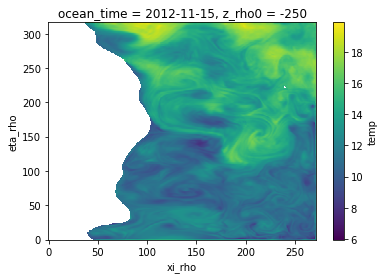

In [28]:
horizontalSectionROMS(grid, xbtPX_Ana.temp, np.array([-250])).isel(ocean_time=-1).plot()

/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)


<xarray.DataArray 'temp' ()>
array(0.67320005)
Coordinates:
    z_rho0   int64 -5


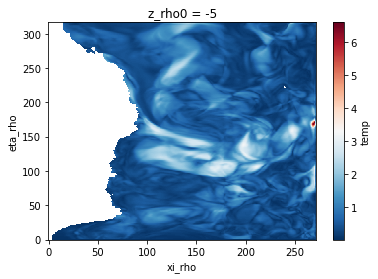

In [40]:
((((horizontalSectionROMS(grid, xbtPX_Ana.temp, np.array([-5])) - horizontalSectionROMS(grid, tru_Ana.temp, np.array([-5])))**2).mean(dim='ocean_time'))**0.5).plot(cmap='RdBu_r')
print(((((horizontalSectionROMS(grid, xbtPX_Ana.temp, np.array([-5])) - horizontalSectionROMS(grid, tru_Ana.temp, np.array([-5])))**2).mean(dim='ocean_time'))**0.5).weighted(weights).mean(('eta_rho','xi_rho')))

/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)
/g/data/fu5/deg581/miniconda3/envs/devel3.9/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:146: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)


<xarray.DataArray 'temp' ()>
array(1.78480866)
Coordinates:
    z_rho0   int64 -250


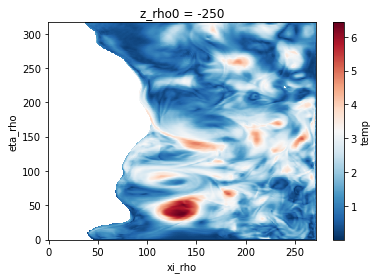

In [38]:
((((horizontalSectionROMS(grid, tru_Ana.temp, np.array([-250])) - horizontalSectionROMS(grid, xbtS_Ana.temp, np.array([-250])))**2).mean(dim='ocean_time'))**0.5).plot(cmap='RdBu_r')
print(((((horizontalSectionROMS(grid, tru_Ana.temp, np.array([-250])) - horizontalSectionROMS(grid, xbtS_Ana.temp, np.array([-250])))**2).mean(dim='ocean_time'))**0.5).weighted(weights).mean(('eta_rho','xi_rho')))

In [ ]:
# # XBTNS_SSH_RMS_Ana['duration'] = (XBTNS_SSH_RMS_Ana.astype('timedelta64[D]'))/np.timedelta64(1,'D')
# XBTNS_SSH_RMS_Ana = XBTNS_SSH_RMS_Ana.rename({'duration','duration_ns'})
# XBTNS_SSH_RMS_Ana['duration_d'] = (XBTNS_SSH_RMS_Ana.duration_ns.astype('timedelta64[D]'))/np.timedelta64(1,'D')


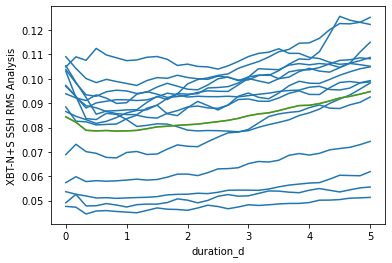

In [13]:
for ii in XBTNS_SSH_RMS_Ana.loop_day:
    XBTNS_SSH_RMS_Ana.sel(loop_day=ii).plot(x='duration_d',color='C0')

XBTNS_SSH_RMS_Ana.mean(dim='loop_day').plot(x='duration_d',color='C1')
XBTNS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(x='duration_d',color='C2')


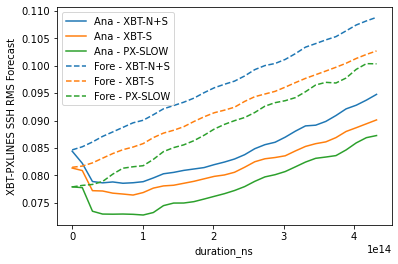

In [14]:
XBTNS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-N+S',color='C0')
XBTS_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-S',color='C1')
XBTPX_SSH_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - PX-SLOW',color='C2')
XBTNS_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-N+S',color='C0',linestyle='--')
XBTS_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-S',color='C1',linestyle='--')
XBTPX_SSH_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - PX-SLOW',color='C2',linestyle='--')
plt.legend()


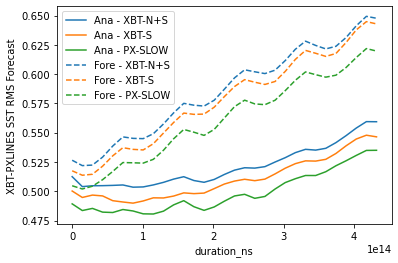

In [15]:
XBTNS_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-N+S',color='C0')
XBTS_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-S',color='C1')
XBTPX_SST_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - PX-SLOW',color='C2')
XBTNS_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-N+S',color='C0',linestyle='--')
XBTS_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-S',color='C1',linestyle='--')
XBTPX_SST_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - PX-SLOW',color='C2',linestyle='--')
plt.legend()


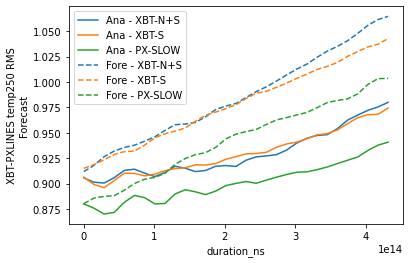

In [16]:
XBTNS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-N+S',color='C0')
XBTS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-S',color='C1')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - PX-SLOW',color='C2')
XBTNS_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-N+S',color='C0',linestyle='--')
XBTS_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-S',color='C1',linestyle='--')
XBTPX_temp250_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - PX-SLOW',color='C2',linestyle='--')
plt.legend()


In [ ]:
# XBTNS_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-N+S',color='C0')
# XBTS_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - XBT-S',color='C1')
# XBTPX_temp500_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Ana - PX-SLOW',color='C2')
# XBTNS_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-N+S',color='C0',linestyle='--')
# XBTS_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - XBT-S',color='C1',linestyle='--')
# XBTPX_temp500_RMS_For.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(label='Fore - PX-SLOW',color='C2',linestyle='--')
# plt.legend()


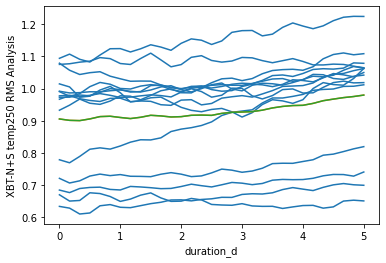

In [17]:
for ii in XBTNS_SSH_RMS_Ana.loop_day:
    XBTNS_temp250_RMS_Ana.sel(loop_day=ii).plot(x='duration_d',color='C0')

XBTNS_temp250_RMS_Ana.mean(dim='loop_day').plot(x='duration_d',color='C1')
XBTNS_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(x='duration_d',color='C2')


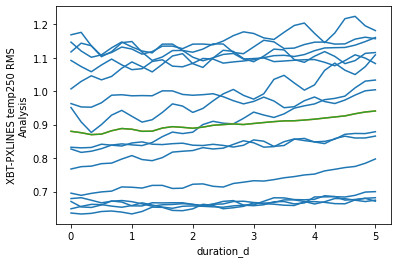

In [18]:
for ii in XBTNS_SSH_RMS_Ana.loop_day:
    XBTPX_temp250_RMS_Ana.sel(loop_day=ii).plot(x='duration_d',color='C0')

XBTPX_temp250_RMS_Ana.mean(dim='loop_day').plot(x='duration_d',color='C1')
XBTPX_temp250_RMS_Ana.sel(loop_day=slice(8041,8429)).mean(dim='loop_day').plot(x='duration_d',color='C2')


In [ ]:
STOP

In [ ]:
ossefilepath = obsOSSEFilePath2
modfilepath = modOSSEFilePath2


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])

fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()




JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds2 = xr.merge(outputs)

In [ ]:
mod.obs_error.where(mod.obs_provenance==939,drop=True).plot(linewidth=0,marker='.')

In [ ]:
plt.plot(mod.obs_time.where((mod.obs_provenance==939),drop=True),mod.obs_depth.where((mod.obs_provenance==939),drop=True),linewidth=0,marker='.',markersize=2,label='All XBT')
plt.plot(mod.obs_time.where((mod.obs_provenance==939)&(~np.isnan(mod.obs_scale)),drop=True),mod.obs_depth.where((mod.obs_provenance==939)&(~np.isnan(mod.obs_scale)),drop=True),linewidth=0,marker='.',markersize=2,label='Rejected XBT')
plt.legend()

In [ ]:
ossefilepath = obsOSSEFilePath3
modfilepath = modOSSEFilePath3


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])
fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()


JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds3 = xr.merge(outputs)

In [ ]:
ossefilepath = obsOSSEFilePath4
modfilepath = modOSSEFilePath4


timeVec = np.zeros(len(datelist))
JobsInitialXBT = np.zeros(len(datelist))
JobsInitialALL = np.zeros(len(datelist))
JobsInitialSST = np.zeros(len(datelist))
JobsInitialSSH = np.zeros(len(datelist))
JobsFinalXBT = np.zeros(len(datelist))
JobsFinalSST = np.zeros(len(datelist))
JobsFinalSSH = np.zeros(len(datelist))
JobsFinalALL = np.zeros(len(datelist))
TLcost_function = np.zeros([15,len(datelist)])
NLcost_function = np.zeros([2,12,len(datelist)])
fig,ax=plt.subplots(nrows=2,figsize=(10,5))

rr=0
for dates in datelist:

    filenameObs = ossefilepath+prefixObs+str(dates)+'.nc'
    filenameMod = modfilepath+prefixMod+'0'+str(dates)+'.nc'

    obs = xr.open_dataset(filenameObs).load()
    mod = xr.open_dataset(filenameMod).load()

    obsALL = obs.obs_value.where(~np.isnan(mod.obs_scale), drop=True)
    obsXBT = obs.obs_value.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSST = obs.obs_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsSSH = obs.obs_value.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrALL = obs.obs_error.where(~np.isnan(mod.obs_scale), drop=True)
    obsErrXBT = obs.obs_error.where((obs.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSST = obs.obs_error.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    obsErrSSH = obs.obs_error.where((obs.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialALL = mod.NLmodel_initial.where(~np.isnan(mod.obs_scale), drop=True)
    modInitialXBT = mod.NLmodel_initial.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSST = mod.NLmodel_initial.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modInitialSSH = mod.NLmodel_initial.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalALL = mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)
    modFinalXBT = mod.NLmodel_value.where((mod.obs_provenance==pRangeXBT)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSST = mod.NLmodel_value.where((obs.obs_provenance==pRangeSST)&(~np.isnan(mod.obs_scale)), drop=True)
    modFinalSSH = mod.NLmodel_value.where((mod.obs_provenance==pRangeSSH)&(~np.isnan(mod.obs_scale)), drop=True)

    JobsInitialALL[rr] = np.nansum((obsALL - modInitialALL)**2 / obsErrALL)
    JobsInitialXBT[rr] = np.nansum((obsXBT - modInitialXBT)**2 / obsErrXBT)
    JobsInitialSST[rr] = np.nansum((obsSST - modInitialSST)**2 / obsErrSST)
    JobsInitialSSH[rr] = np.nansum((obsSSH - modInitialSSH)**2 / obsErrSSH)
    JobsFinalALL[rr] = np.nansum((obsALL - modFinalALL)**2 / obsErrALL)
    JobsFinalXBT[rr] = np.nansum((obsXBT - modFinalXBT)**2 / obsErrXBT)
    JobsFinalSST[rr] = np.nansum((obsSST - modFinalSST)**2 / obsErrSST)
    JobsFinalSSH[rr] = np.nansum((obsSSH - modFinalSSH)**2 / obsErrSSH)
    TLcost_function[:,rr] = mod.TLcost_function
    NLcost_function[:,:,rr] = mod.NLcost_function
    
    if rr==0:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.',label='ALL')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.',label='SST')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.',label='SSH')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.',label='XBT')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='ALL')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.',label='SST/Total')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale)*100),color='C1',linewidth=0,marker='.',label='SSH/TotalSSH')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale)*100),color='C2',linewidth=0,marker='.',label='XBT/TotalXBT')
    else:
        ax[0].plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values,color='C0',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values,color='C1',linewidth=0,marker='.')
        ax[0].plot(np.nanmean(dates),np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values,color='C2',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==340)).values/(np.shape(mod.obs_scale.where(mod.obs_provenance==340,drop=True)))*100),color='C0',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==405)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==405,drop=True))*100),color='C1',linewidth=0,marker='.')
        ax[1].plot(np.nanmean(dates),(np.sum((np.isnan(mod.obs_scale))&(mod.obs_provenance==939)).values/np.shape(mod.obs_scale.where(mod.obs_provenance==939,drop=True))*100),color='C2',linewidth=0,marker='.')
         
    

    
    timeVec[rr]=np.nanmean(dates)
    rr=rr+1
ax[0].legend()
ax[1].legend()

JobsInitialALL = xr.DataArray(JobsInitialALL,coords=[timeCoordinate],dims='time',name='JobsInitialALL')
JobsInitialXBT = xr.DataArray(JobsInitialXBT,coords=[timeCoordinate],dims='time',name='JobsInitialXBT')
JobsInitialSST = xr.DataArray(JobsInitialSST,coords=[timeCoordinate],dims='time',name='JobsInitialSST')
JobsInitialSSH = xr.DataArray(JobsInitialSSH,coords=[timeCoordinate],dims='time',name='JobsInitialSSH')
JobsFinalALL = xr.DataArray(JobsFinalALL,coords=[timeCoordinate],dims='time',name='JobsFinalALL')
JobsFinalXBT = xr.DataArray(JobsFinalXBT,coords=[timeCoordinate],dims='time',name='JobsFinalXBT')
JobsFinalSST = xr.DataArray(JobsFinalSST,coords=[timeCoordinate],dims='time',name='JobsFinalSST')
JobsFinalSSH = xr.DataArray(JobsFinalSSH,coords=[timeCoordinate],dims='time',name='JobsFinalSSH')
cycle = xr.DataArray(timeVec,coords=[timeCoordinate],dims='time',name='cycle')
TLcost_function = xr.DataArray(TLcost_function,coords=[iteration,timeCoordinate],dims=['inner_loop','time'],name='TLcost_function')
NLcost_function = xr.DataArray(NLcost_function,coords=[Mouter, cost_var, timeCoordinate],dims=['Mouter','cost_var','time'],name='NLcost_function')

outputs = [JobsInitialALL,JobsInitialXBT,JobsInitialSST,JobsInitialSSH,JobsFinalALL,JobsFinalXBT,JobsFinalSST,JobsFinalSSH,cycle,TLcost_function,NLcost_function]

ds4 = xr.merge(outputs)

In [ ]:
(np.sum(np.isnan(mod.obs_scale)).values/np.shape(mod.obs_scale)*100).round(2)

In [ ]:
plt.plot(np.nanmean(dates),np.sum(np.isnan(mod.obs_scale)).values,linewidth=0,marker='.')

In [ ]:
obsSST

In [ ]:
modInitialSST

In [ ]:
modFinalSST

In [ ]:
obsErrSST

In [ ]:
((obsSST - modInitialSST)**2/obsErrSST).plot(linewidth=0,marker='.')

In [ ]:
((obsSST - modInitialSST)**2/obsErrSST)[20001]

In [ ]:
obsSST[20001]

In [ ]:
modInitialSST[20001]


In [ ]:
modInitialSST


In [ ]:
((obsSST - modFinalSST)**2/obsErrSST).plot(linewidth=0,marker='.')

In [ ]:
JobsInitialSST

In [ ]:
ds2.NLcost_function

In [ ]:
((obsALL - modFinalALL)**2).plot()
plt.show()
obsErrALL.plot(marker='o')

In [ ]:
((obsALL - modFinalALL)**2).isel(datum=158201)

In [ ]:
obsALL.isel(datum=158201)

In [ ]:
modFinalALL.isel(datum=158201)

In [ ]:
modInitialALL.isel(datum=158201)

In [ ]:
np.argmax(((obsALL - modFinalALL)**2).values)

In [ ]:
mod.NLmodel_initial!=0

In [ ]:
pRangeXBT

In [ ]:
mod.NLmodel_value.where((obs.obs_provenance!=pRangeSST)|((obs.obs_provenance==pRangeSST)&(mod.NLmodel_initial!=0))|((obs.obs_provenance==pRangeXBT)&(mod.NLmodel_initial!=0)),drop=True)

In [ ]:
mod.NLmodel_value.where(~np.isnan(mod.obs_scale), drop=True)

In [ ]:
np.isnan(mod.obs_scale)

In [ ]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
# ax.plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
# ax.plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
# ax[1].plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ax[1].plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[1].plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ax[2].plot(timeVec,JobsInitialXBT, linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[2].plot(timeVec,JobsFinalXBT, linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ax[3].plot(timeVec,JobsInitialALL, linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
# ax[0].plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax[3].plot(timeVec,JobsFinalALL, linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax[0].grid()
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


In [ ]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.plot(timeVec,JobsInitialSST,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ax.plot(timeVec,JobsFinalSST, linestyle='-',marker='o',color="C0",label='Jobs final SST')
ax.plot(timeVec,JobsInitialSSH, linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ax.plot(timeVec,JobsFinalSSH, linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ax.plot(timeVec,JobsInitialXBT, linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
ax.plot(timeVec,JobsFinalXBT, linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ax.plot(timeVec,JobsInitialALL, linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
ax.plot(timeVec,JobsFinalALL, linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()


In [ ]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='J_{final}/J_{ini} SST')
ax[1].plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='J_{final}/J_{ini} SSH')
ax[2].plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='J_{final}/J_{ini} XBT')
ax[3].plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='J_{final}/J_{ini} ALL')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


In [ ]:
fig, ax = plt.subplots(4,figsize=(10,5))
ax[0].plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='J_{final}/J_{ini} SST')
ax[1].plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='J_{final}/J_{ini} SSH')
ax[2].plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='J_{final}/J_{ini} XBT')
ax[3].plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='J_{final}/J_{ini} ALL')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


In [ ]:
fig, ax = plt.subplots(1,figsize=(10,5)) 
ax.plot(timeVec,JobsFinalSST/JobsInitialSST, linestyle='-',marker='o',color="C0",label='SST')
ax.plot(timeVec,JobsFinalSSH/JobsInitialSSH, linestyle='-',marker='o',color="C1",label='SSH')
ax.plot(timeVec,JobsFinalXBT/JobsInitialXBT, linestyle='-',marker='o',color="C2",label='XBT')
ax.plot(timeVec,JobsFinalALL/JobsInitialALL, linestyle='-',marker='o',color="C3",label='ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()
ax.set_title('Ratio of $J_{final}/J_{ini}$ for each obs type')

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.bar(timeVec,JobsInitialSST,color="C0",label='Jobs SST')
ax.bar(timeVec,JobsInitialSSH,bottom=JobsInitialSST,color="C1",label='Jobs SSH')
fig.suptitle('Jobs initial')
ax.grid()
ax.legend()

fig, ax = plt.subplots(1,figsize=(10,5))
ax.bar(timeVec,JobsFinalSST,color="C0",label='Jobs SST')
ax.bar(timeVec,JobsFinalSSH,bottom=JobsFinalSST,color="C1",label='Jobs SSH')
fig.suptitle('Jobs final')
ax.grid()
ax.legend()

Now do same but with ds outputs

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,5))
ds1.JobsInitialSST.plot(ax=ax,linestyle='--',marker='o',color="C0",label='Jobs initial SST')
ds1.JobsFinalSST.plot(ax=ax,linestyle='-',marker='o',color="C0",label='Jobs final SST')
ds1.JobsInitialSSH.plot(ax=ax,linestyle='--',marker='o',color="C1",label='Jobs initial SSH')
ds1.JobsFinalSSH.plot(ax=ax,linestyle='-',marker='o',color="C1",label='Jobs final SSH')
ds1.JobsInitialXBT.plot(ax=ax,linestyle='--',marker='o',color="C2",label='Jobs initial XBT')
ds1.JobsFinalXBT.plot(ax=ax,linestyle='-',marker='o',color="C2",label='Jobs final XBT')
ds1.JobsInitialALL.plot(ax=ax,linestyle='--',marker='o',color="C3",label='Jobs initial ALL')
ds1.JobsFinalALL.plot(ax=ax,linestyle='-',marker='o',color="C3",label='Jobs final ALL')
ax.grid()
ax.legend()
ax.legend()
ax.legend()
ax.legend()


In [ ]:

# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None



ax = fig.add_subplot(gs[0,0])
(ds1.JobsFinalALL/ds1.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C0",label='Surf')
(ds2.JobsFinalALL/ds2.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C3",label='XBT-N+S')
(ds3.JobsFinalALL/ds3.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C1",label='XBT-N')
(ds4.JobsFinalALL/ds4.JobsInitialALL).plot(ax=ax,linestyle='--',marker='o',color="C2",label='XBT-S')
ax.legend()
ax.set_ylabel('Ratio of Final/Initial observation cost function')

In [ ]:
print(str(((ds1.JobsFinalALL/ds1.JobsInitialALL).mean(dim='time')).round(2).values)+' Surf')
print(str(((ds2.JobsFinalALL/ds2.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-N+S')
print(str(((ds3.JobsFinalALL/ds3.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-N')
print(str(((ds4.JobsFinalALL/ds4.JobsInitialALL).mean(dim='time')).round(2).values)+' XBT-S')

In [ ]:
print(ds2.JobsInitialALL)
print(ds2.JobsInitialALL.mean(dim='time'))
print(ds2.JobsInitialALL.isel(time=-1))

In [ ]:
print(ds2.JobsFinalALL)
print(ds2.JobsFinalALL.mean(dim='time'))
print(ds2.JobsFinalALL.isel(time=-1))

In [ ]:
print(ds2.NLcost_function.isel(Mouter=1,time=-1))
print(ds2.NLcost_function.isel(Mouter=0,time=-1))

In [ ]:
xbt = mod.obs_depth.where(mod.obs_provenance==939,drop=True)
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot(linewidth=0,marker='.')
plt.show()
xbt.plot(linewidth=0,marker='.')
plt.show()
mod.obs_depth.where(mod.obs_provenance==939,drop=True).plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.plot(linewidth=0,marker='.')
plt.show()
mod.obs_provenance.plot.hist()
plt.show()
mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot.hist()

In [ ]:
mod.obs_provenance.plot.hist()
# plt.show()
# mod.obs_provenance.where(np.isnan(mod.obs_scale),drop=True).plot.hist()
# plt.show()


In [ ]:

# gs to make a 4 row, 7 col plot
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None



ax = fig.add_subplot(gs[0,0])
(ds1.TLcost_function.mean(dim='time')/ds1.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C0",label='Surf')
(ds2.TLcost_function.mean(dim='time')/ds2.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C3",label='XBT-N+S')
(ds3.TLcost_function.mean(dim='time')/ds3.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C1",label='XBT-N')
(ds4.TLcost_function.mean(dim='time')/ds4.TLcost_function.mean(dim='time').isel(inner_loop=0)).plot(ax=ax,linestyle='--',marker='o',color="C2",label='XBT-S')
ax.plot(15,(ds1.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds1.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C0",label='')
ax.plot(15,(ds2.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds2.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C3",label='')
ax.plot(15,(ds3.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds3.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C1",label='')
ax.plot(15,(ds4.NLcost_function.isel(Mouter=1,time=-1,cost_var=0)/ds4.NLcost_function.isel(Mouter=0,time=-1,cost_var=0)),linestyle='--',marker='x',color="C2",label='')
ax.legend()
ax.set_xlabel('Inner Loops')
ax.set_ylabel('Ratio of Final/Initial cost function')
ax.set_title('Reduction in cost function each loop, averaged over all assimilation windows, for the TLM (circles) and NLM (crosses)')
ax.set_xticks(iteration)
ax.grid()

In [ ]:
print(ds2.NLcost_function.isel(Mouter=1,time=-1,cost_var=0))
print(ds2.NLcost_function.isel(Mouter=0,time=-1,cost_var=0))

In [ ]:
ds2.NLcost_function.isel(time=-1)

In [ ]:
(ds1.TLcost_function.isel(time=0)/ds1.TLcost_function.isel(time=0).isel(inner_loop=0)).plot(linestyle='--',marker='o',color="C0",label='Surf')


In [ ]:
mod

In [ ]:
mod.NLcost_function.shape